## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### Importing Dataset

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### Checking Dataset

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.shape

(614, 13)

In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [10]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Missing Values

In [11]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Removing All Unnecessary Feature

In [12]:
train = train.drop(['Loan_ID'], axis=1) 

In [13]:
train.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Cleaning Dataset

In [14]:
train['Dependents'].replace('3+', 3,inplace=True)

In [15]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [17]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
train.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# Visualization

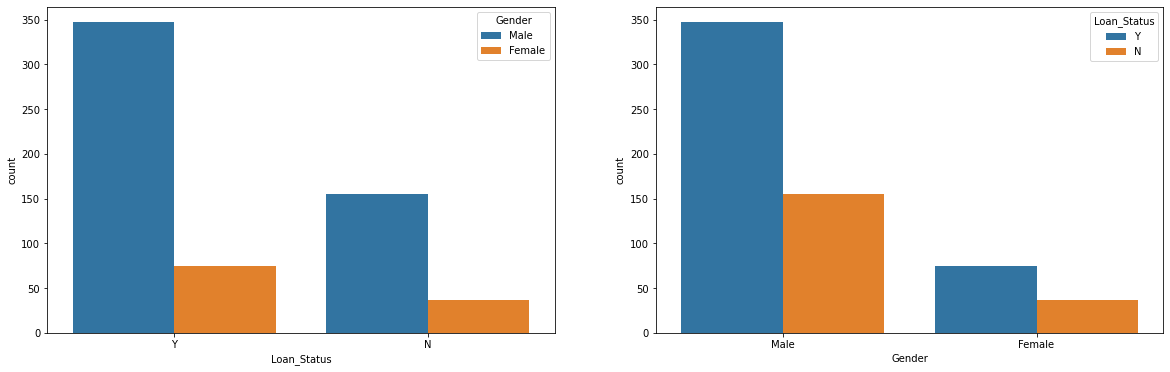

In [19]:
# Relation between Gender and Loan Status
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(train["Loan_Status"], hue=train["Gender"], ax=ax[0])
sns.countplot(train["Gender"], hue=train["Loan_Status"], ax=ax[1])

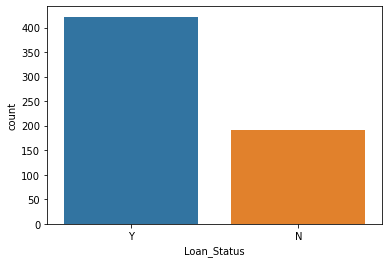

In [20]:
sns.countplot(train["Loan_Status"])

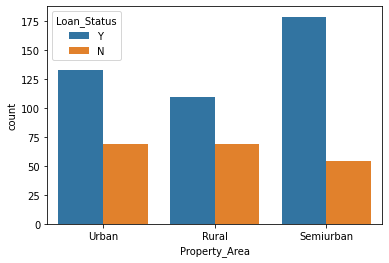

In [21]:
sns.countplot(train['Property_Area'],hue=train['Loan_Status'])

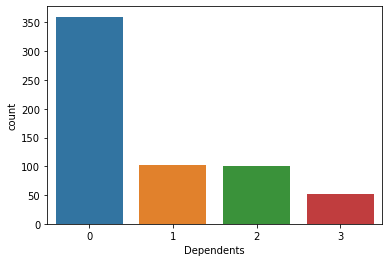

In [22]:
sns.countplot(train["Dependents"])

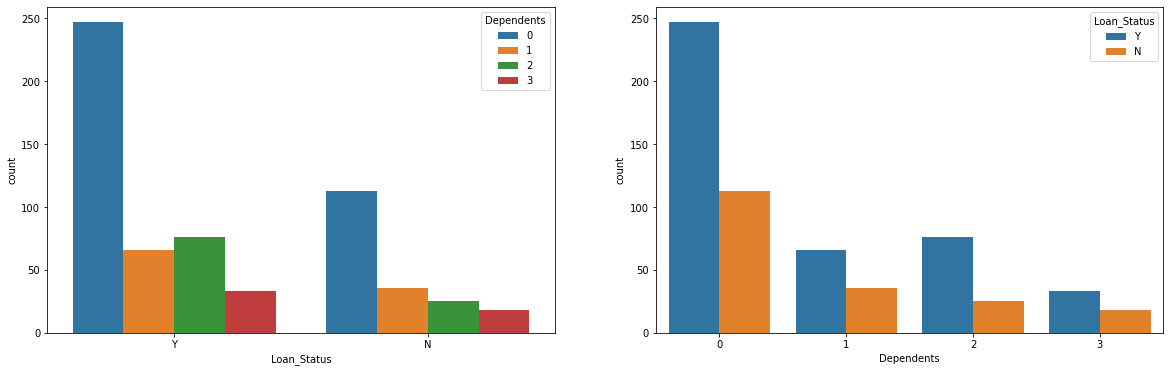

In [23]:
# Relation between Married and Loan Status
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(train["Loan_Status"], hue=train["Dependents"], ax=ax[0])
sns.countplot(train["Dependents"], hue=train["Loan_Status"], ax=ax[1])

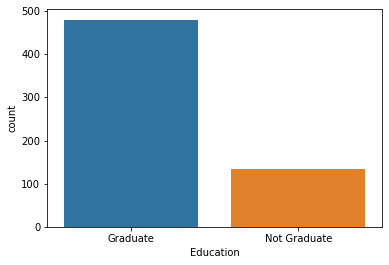

In [24]:
sns.countplot(train["Education"])

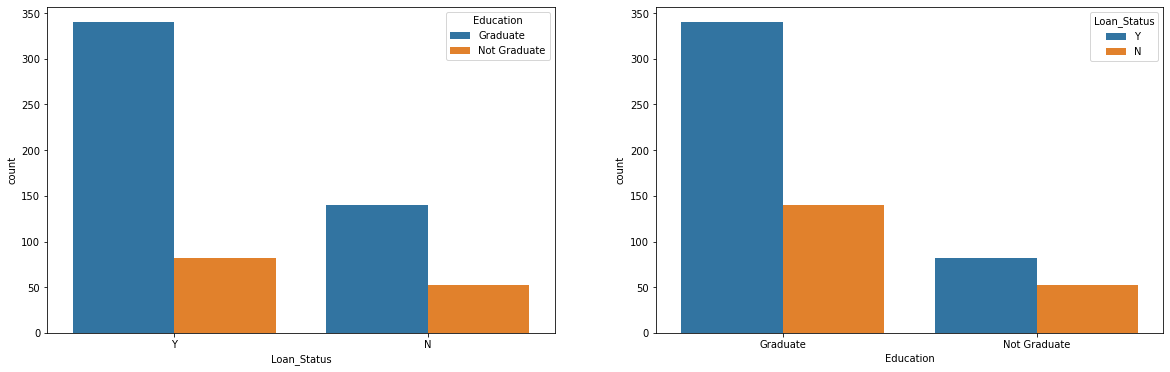

In [25]:
# Relation between Married and Loan Status
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(train["Loan_Status"], hue=train["Education"], ax=ax[0])
sns.countplot(train["Education"], hue=train["Loan_Status"], ax=ax[1])

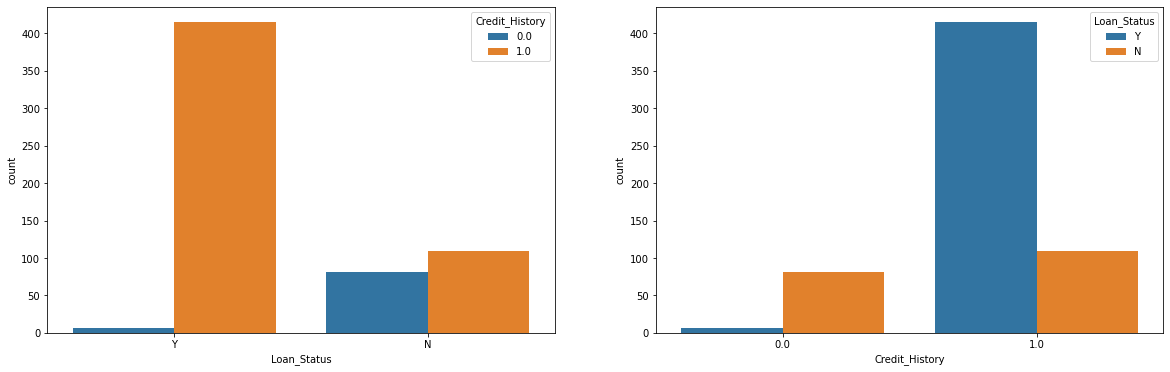

In [26]:
# Relation between Married and Loan Status
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(train["Loan_Status"], hue=train["Credit_History"], ax=ax[0])
sns.countplot(train["Credit_History"], hue=train["Loan_Status"], ax=ax[1])

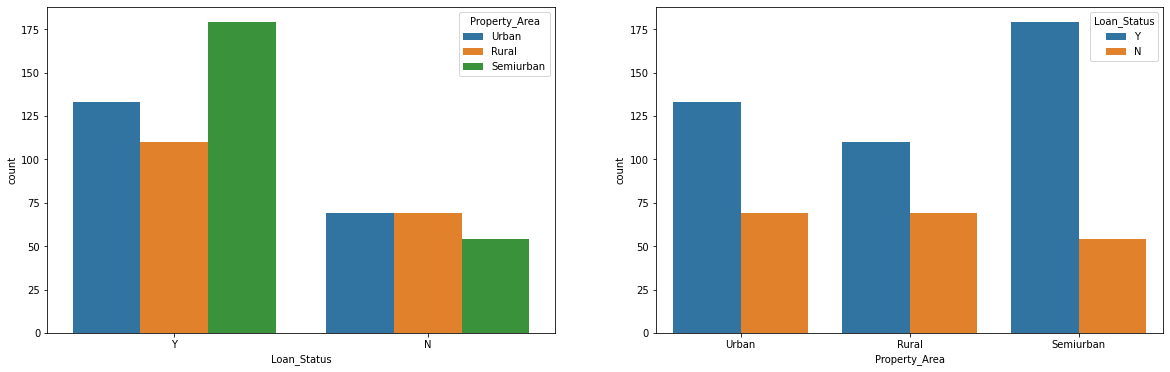

In [27]:
# Relation between Married and Loan Status
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(train["Loan_Status"], hue=train["Property_Area"], ax=ax[0])
sns.countplot(train["Property_Area"], hue=train["Loan_Status"], ax=ax[1])

#### Q> Does hight earning people ask for high amount loan ?¶

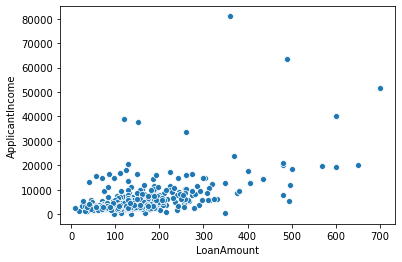

In [28]:
sns.scatterplot(train["LoanAmount"], train["ApplicantIncome"])

# Encoding Dataset

In [29]:
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

In [30]:
train['Married'].replace('No', 0,inplace=True)
train['Married'].replace('Yes', 1,inplace=True)

In [31]:
train['Education'].replace('Not Graduate', 0,inplace=True)
train['Education'].replace('Graduate', 1,inplace=True)

In [32]:
train['Gender'].replace('Male', 0,inplace=True)
train['Gender'].replace('Female', 1,inplace=True)

In [33]:
train['Self_Employed'].replace('No', 0,inplace=True)
train['Self_Employed'].replace('Yes', 1,inplace=True)

In [34]:
train.head(30)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1
6,0,1,0,0,0,2333,1516.0,95.0,360.0,1.0,Urban,1
7,0,1,3,1,0,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,0,1,2,1,0,4006,1526.0,168.0,360.0,1.0,Urban,1
9,0,1,1,1,0,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [35]:
lb = LabelEncoder()
lb.fit(['Urban', 'Rural', 'Semiurban'])
train['Property_Area'] = lb.transform(train['Property_Area'])

In [36]:
train.head(30)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
6,0,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1
7,0,1,3,1,0,3036,2504.0,158.0,360.0,0.0,1,0
8,0,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,1
9,0,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1,0


# Splitting Train/Test/ Validation 

In [37]:
X = train.drop(['Loan_Status'],axis=1)
y = train['Loan_Status']

In [38]:
# 80% Train, 10% Validation, %10 Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 614
Total # of sample in train dataset: 491
Total # of sample in validation dataset: 61
Total # of sample in test dataset: 62


# Running Machine Learning Models

In [39]:
models = {
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC()
}

for m in models:
    model = models[m]
    model.fit(X_train, y_train)
    score = model.score(X_valid, y_valid)
    print(f'{m} validattion score =>: {score}')

GaussianNB validattion score =>: 0.8032786885245902
BernoulliNB validattion score =>: 0.819672131147541
MultinomialNB validattion score =>: 0.5245901639344263
LogisticRegression validattion score =>: 0.819672131147541
SVC validattion score =>: 0.6885245901639344


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
model = LogisticRegression()
model.fit(X_train, y_train)

validation_score = model.score(X_valid, y_valid)
print(f'Validation score of trained model: {validation_score}')



Validation score of trained model: 0.819672131147541


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Best is Logistic Regression with 81.9% Accuracy

In [41]:
from sklearn.metrics import classification_report

In [42]:
y_predictions = model.predict(X_test)
print(classification_report(y_predictions, y_test))

              precision    recall  f1-score   support

           0       0.38      1.00      0.55         9
           1       1.00      0.72      0.84        53

    accuracy                           0.76        62
   macro avg       0.69      0.86      0.69        62
weighted avg       0.91      0.76      0.79        62



In [43]:
model.fit(X, y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Predicting on Test Dataset

In [64]:
test = pd.read_csv('test.csv')

In [65]:
test.head(40)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [66]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [67]:
test = test.drop(['Loan_ID'], axis=1) 

In [68]:
test['Dependents'].replace('3+', 3,inplace=True)

In [69]:
test['Married'].replace('No', 0,inplace=True)
test['Married'].replace('Yes', 1,inplace=True)
test['Education'].replace('Not Graduate', 0,inplace=True)
test['Education'].replace('Graduate', 1,inplace=True)
test['Gender'].replace('Male', 0,inplace=True)
test['Gender'].replace('Female', 1,inplace=True)
test['Self_Employed'].replace('No', 0,inplace=True)
test['Self_Employed'].replace('Yes', 1,inplace=True)

In [70]:
lb.fit(['Urban', 'Rural', 'Semiurban'])
test['Property_Area'] = lb.transform(test['Property_Area'])

In [71]:
test.head(30)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1,0,1,0.0,5720,0,110.0,360.0,1.0,2
1,0.0,1,1,1,0.0,3076,1500,126.0,360.0,1.0,2
2,0.0,1,2,1,0.0,5000,1800,208.0,360.0,1.0,2
3,0.0,1,2,1,0.0,2340,2546,100.0,360.0,NaN,2
4,0.0,0,0,0,0.0,3276,0,78.0,360.0,1.0,2
5,0.0,1,0,0,1.0,2165,3422,152.0,360.0,1.0,2
6,1.0,0,1,0,0.0,2226,0,59.0,360.0,1.0,1
7,0.0,1,2,0,0.0,3881,0,147.0,360.0,0.0,0
8,0.0,1,2,1,NaN,13633,0,280.0,240.0,1.0,2
9,0.0,0,0,0,0.0,2400,2400,123.0,360.0,1.0,1


# Replacving null with 0

In [72]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [73]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [74]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [75]:
pred = model.predict(test)

In [76]:
test['Loan_Status'] = pred 

# Loan Status Prediction

In [77]:
test.head(30)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1,0,1,0.0,5720,0,110.0,360.0,1.0,2,1
1,0.0,1,1,1,0.0,3076,1500,126.0,360.0,1.0,2,1
2,0.0,1,2,1,0.0,5000,1800,208.0,360.0,1.0,2,1
3,0.0,1,2,1,0.0,2340,2546,100.0,360.0,1.0,2,1
4,0.0,0,0,0,0.0,3276,0,78.0,360.0,1.0,2,1
5,0.0,1,0,0,1.0,2165,3422,152.0,360.0,1.0,2,1
6,1.0,0,1,0,0.0,2226,0,59.0,360.0,1.0,1,1
7,0.0,1,2,0,0.0,3881,0,147.0,360.0,0.0,0,0
8,0.0,1,2,1,0.0,13633,0,280.0,240.0,1.0,2,1
9,0.0,0,0,0,0.0,2400,2400,123.0,360.0,1.0,1,1


In [78]:
test['Loan_Status'].replace(0, 'N',inplace=True)
test['Loan_Status'].replace(1, 'Y',inplace=True)

In [79]:
test['Property_Area'].replace(2, 'Urban',inplace=True)
test['Property_Area'].replace(1, 'Semiurban',inplace=True)
test['Property_Area'].replace(0, 'Rural',inplace=True)

In [80]:
test['Education'].replace(0, 'Not Graduate',inplace=True)
test['Education'].replace(1, 'Graduate',inplace=True)

In [81]:
test['Married'].replace(0, 'No',inplace=True)
test['Married'].replace(1, 'Yes',inplace=True)

In [82]:
test['Gender'].replace(0, 'Male',inplace=True)
test['Gender'].replace(1, 'Female',inplace=True)

In [83]:
test.head(50)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,0.0,5720,0,110.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,0.0,3076,1500,126.0,360.0,1.0,Urban,Y
2,Male,Yes,2,Graduate,0.0,5000,1800,208.0,360.0,1.0,Urban,Y
3,Male,Yes,2,Graduate,0.0,2340,2546,100.0,360.0,1.0,Urban,Y
4,Male,No,0,Not Graduate,0.0,3276,0,78.0,360.0,1.0,Urban,Y
5,Male,Yes,0,Not Graduate,1.0,2165,3422,152.0,360.0,1.0,Urban,Y
6,Female,No,1,Not Graduate,0.0,2226,0,59.0,360.0,1.0,Semiurban,Y
7,Male,Yes,2,Not Graduate,0.0,3881,0,147.0,360.0,0.0,Rural,N
8,Male,Yes,2,Graduate,0.0,13633,0,280.0,240.0,1.0,Urban,Y
9,Male,No,0,Not Graduate,0.0,2400,2400,123.0,360.0,1.0,Semiurban,Y


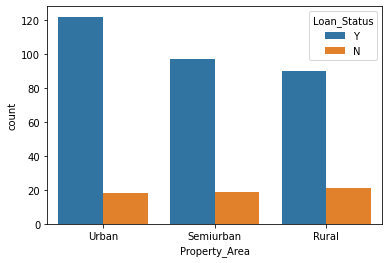

In [84]:
sns.countplot(test['Property_Area'],hue=test['Loan_Status'])

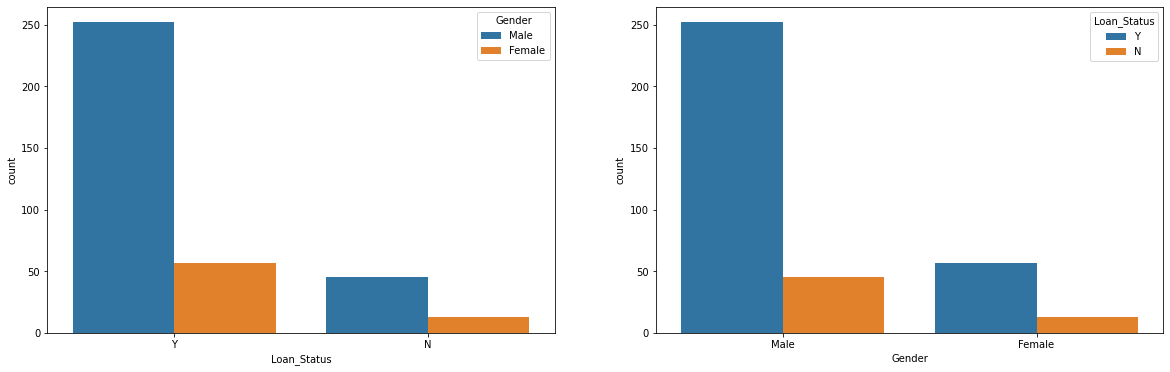

In [85]:
# Relation between Gender and Loan Status
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(test["Loan_Status"], hue=test["Gender"], ax=ax[0])
sns.countplot(test["Gender"], hue=test["Loan_Status"], ax=ax[1])